In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,LabelEncoder
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
dTA = pd.read_csv('Machine learning.csv')
dTA.head()

,Sample Length,Sample Diameter,Sample Volume,Dry Weight,Particle Volume,Pore Volume,Porosity,Particle Density,Volumetric Density,Permeability,Location,BI Vol.,Bioturbation Index
0,2.146,2.528,10.766,26.84,10.06,0.7015,6.5122,2.49,2.67,0.0160,Burrow,96,5
1,4.246,2.526,21.267,53.86,20.52,0.7446,3.4995,2.53,2.62,0.0156,Burrow,4,1
2,2.394,2.524,11.972,30.28,11.52,0.4557,3.8041,2.53,2.63,0.0350,Burrow,100,6
3,2.384,2.538,12.055,30.57,11.12,0.9343,7.7463,2.54,2.75,0.0246,Burrow,96,5
4,4.142,2.536,20.911,52.22,19.28,1.6342,7.8109,2.50,2.71,0.0241,Matrix,0,0


In [3]:
Encoder = LabelEncoder()
dTA['Location'] = Encoder.fit_transform(dTA['Location'])

In [4]:
print('Checking the Null: ',dTA.isnull().sum())
print('Checking the Nan: ',dTA.isna().sum())

Checking the Null:  Sample Length         0
Sample Diameter       0
Sample Volume         0
Dry Weight            0
Particle Volume       0
Pore Volume           0
Porosity              0
Particle Density      0
Volumetric Density    0
Permeability          0
Location              0
BI Vol.               0
Bioturbation Index    0
dtype: int64
Checking the Nan:  Sample Length         0
Sample Diameter       0
Sample Volume         0
Dry Weight            0
Particle Volume       0
Pore Volume           0
Porosity              0
Particle Density      0
Volumetric Density    0
Permeability          0
Location              0
BI Vol.               0
Bioturbation Index    0
dtype: int64


In [5]:
dTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sample Length       76 non-null     float64
 1   Sample Diameter     76 non-null     float64
 2   Sample Volume       76 non-null     float64
 3   Dry Weight          76 non-null     float64
 4   Particle Volume     76 non-null     float64
 5   Pore Volume         76 non-null     float64
 6   Porosity            76 non-null     float64
 7   Particle Density    76 non-null     float64
 8   Volumetric Density  76 non-null     float64
 9   Permeability        76 non-null     float64
 10  Location            76 non-null     int32  
 11  BI Vol.             76 non-null     int64  
 12  Bioturbation Index  76 non-null     int64  
dtypes: float64(10), int32(1), int64(2)
memory usage: 7.6 KB


In [6]:
dTA.describe()

,Sample Length,Sample Diameter,Sample Volume,Dry Weight,Particle Volume,Pore Volume,Porosity,Particle Density,Volumetric Density,Permeability,Location,BI Vol.,Bioturbation Index
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.670474,2.456237,12.706955,30.601053,11.270075,1.439730,11.905903,2.545579,2.601763,0.543403,0.421053,52.328947,2.934211
std,1.009254,0.067536,5.083903,12.662752,4.818277,0.940347,6.871460,0.253269,0.191158,1.388744,0.804374,41.781779,2.093390
min,0.946000,2.345000,4.472100,11.190000,3.927600,0.120100,1.784700,2.310000,2.002300,0.007100,0.000000,0.000000,0.000000
25%,1.954500,2.382000,9.704250,23.385000,8.790750,0.962350,7.584800,2.380000,2.511050,0.035600,0.000000,4.000000,1.000000
50%,2.415500,2.461500,11.666000,28.005000,10.270000,1.316400,11.015000,2.475000,2.685000,0.152500,0.000000,60.000000,3.000000
75%,3.394250,2.526000,14.977500,34.065000,12.557500,1.627300,12.477500,2.542500,2.710000,0.316750,0.000000,94.500000,5.000000
max,4.996000,2.552000,25.399000,63.170000,23.640000,5.375300,28.398000,3.307400,3.080000,7.009700,2.000000,100.000000,6.000000


In [7]:
X = dTA.drop(['Porosity'], axis=1)
y = dTA['Porosity']
print(X.shape,y.shape)

(76, 12) (76,)


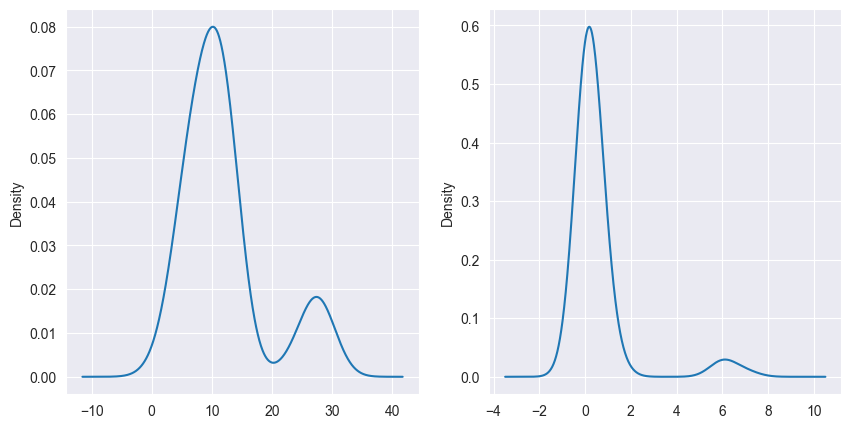

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
dTA['Porosity'].plot(kind='density', ax=ax[0])
dTA['Permeability'].plot(kind='density', ax=ax[1])

plt.show()

array([[<Axes: title={'center': 'Sample Length'}>,
        <Axes: title={'center': 'Sample Diameter'}>,
        <Axes: title={'center': 'Sample Volume'}>,
        <Axes: title={'center': 'Dry Weight'}>],
       [<Axes: title={'center': 'Particle Volume'}>,
        <Axes: title={'center': 'Pore Volume'}>,
        <Axes: title={'center': 'Porosity'}>,
        <Axes: title={'center': 'Particle Density'}>],
       [<Axes: title={'center': 'Volumetric Density'}>,
        <Axes: title={'center': 'Permeability'}>,
        <Axes: title={'center': 'Location'}>,
        <Axes: title={'center': 'BI Vol.'}>],
       [<Axes: title={'center': 'Bioturbation Index'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

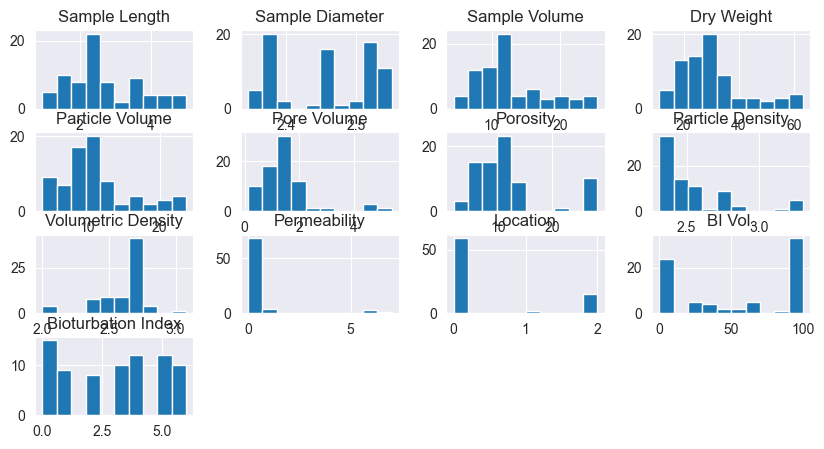

In [9]:
dTA.hist(figsize=(10,5))

In [10]:
scaler = MinMaxScaler()
X = dTA.drop('Porosity', axis=1)
cols = list(X.columns)
X = scaler.fit_transform(X)
new_dTA = pd.DataFrame(X, columns=cols)
new_dTA['Porosity'] = dTA['Porosity']
new_dTA.head()

,Sample Length,Sample Diameter,Sample Volume,Dry Weight,Particle Volume,Pore Volume,Particle Density,Volumetric Density,Permeability,Location,BI Vol.,Bioturbation Index,Porosity
0,0.296296,0.884058,0.300756,0.301077,0.311094,0.110633,0.180469,0.619560,0.001271,0.5,0.96,0.833333,6.5122
1,0.814815,0.874396,0.802551,0.820893,0.841724,0.118835,0.220573,0.573165,0.001214,0.5,0.04,0.166667,3.4995
2,0.357531,0.864734,0.358386,0.367257,0.385159,0.063861,0.220573,0.582444,0.003984,0.0,1.00,1.000000,3.8041
3,0.355062,0.932367,0.362352,0.372836,0.364867,0.154932,0.230600,0.693792,0.002499,0.0,0.96,0.833333,7.7463
4,0.789136,0.922705,0.785539,0.789342,0.778819,0.288115,0.190495,0.656676,0.002428,1.0,0.00,0.000000,7.8109


<Axes: >

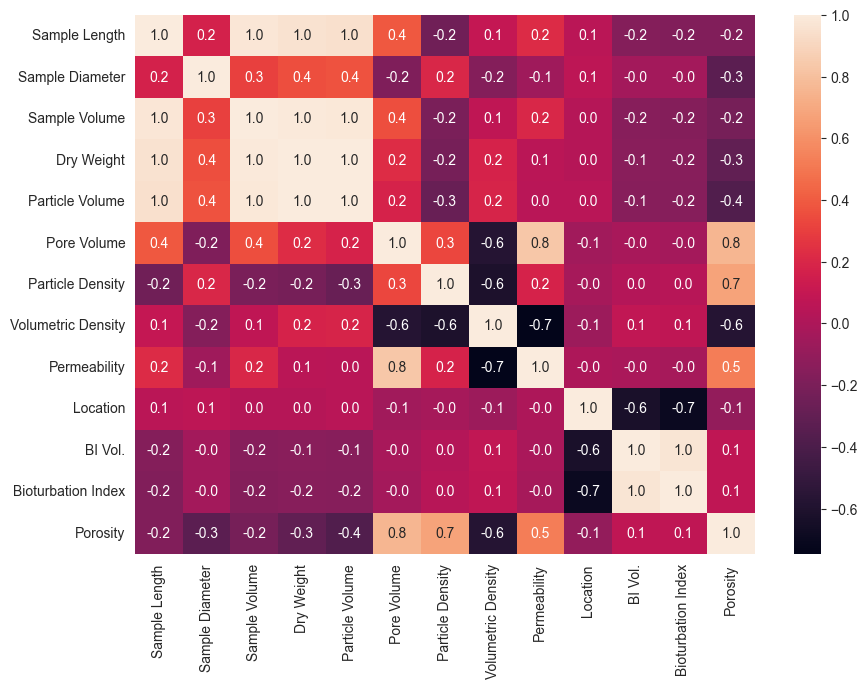

In [11]:
data_correlation = new_dTA.corr()
plt.figure(figsize=(10,7))
sns.heatmap(data_correlation, annot=True, fmt='0.1f')

In [12]:
X = new_dTA.drop('Porosity',axis=1)
y = new_dTA['Porosity']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60, 12) (16, 12)
(60,) (16,)


In [13]:
from sklearn.feature_selection import SelectKBest,  mutual_info_regression, f_regression

# 1. Using f_regression as a score_fun 
# 2. Using mutual_info_regression as score_fun

In [14]:
plt.figure(figsize=(12,5))
F_REG = SelectKBest(score_func = f_regression, k='all')
F_REG.fit_transform(X_train, y_train)
ReG_SCORE = pd.DataFrame()
ReG_SCORE['FEATURES'] = X_train.columns
ReG_SCORE['F_regression SCORES'] = F_REG.scores_

#plt.bar(ReG_SCORE['FEATURES'], ReG_SCORE['SCORE'])
#plt.xticks(rotation = 45)

<Figure size 1200x500 with 0 Axes>

In [15]:
#Mutual REGRESSOR
mUT_REG = SelectKBest(score_func=mutual_info_regression, k='all')
mUT_REG.fit_transform(X_train,y_train)
mUT_SCORE = pd.DataFrame()
mUT_SCORE['features'] = X_train.columns
mUT_SCORE['Mutual_info_regression SCORES'] = mUT_REG.scores_

In [16]:
SCORES = pd.concat([ReG_SCORE, mUT_SCORE], axis=1)
SCORES.to_csv('Features.csv')
SCORES

,FEATURES,F_regression SCORES,features,Mutual_info_regression SCORES
0,Sample Length,0.886153,Sample Length,0.114649
1,Sample Diameter,8.252563,Sample Diameter,0.689300
2,Sample Volume,1.798919,Sample Volume,0.200993
3,Dry Weight,4.708442,Dry Weight,0.153573
4,Particle Volume,7.673262,Particle Volume,0.160814
5,Pore Volume,92.042723,Pore Volume,0.564716
6,Particle Density,39.466755,Particle Density,0.547264
7,Volumetric Density,20.995416,Volumetric Density,0.647616
8,Permeability,23.955599,Permeability,0.280801
9,Location,0.159866,Location,0.000000


In [17]:
fs = SelectKBest()
svr = SVR()
pipe = Pipeline(steps=[('fs', fs), ('svr', svr)])
cv = KFold(n_splits=5)
param = {'svr__kernel': ['rbf', 'poly', 'linear'],
         'svr__C': [1, 10],
         'fs__k': [x for x in range(1, X_train.shape[1] + 1)],
         'fs__score_func':[mutual_info_regression,f_regression]
         }
search = GridSearchCV(pipe, param_grid=param, cv=cv, scoring='neg_mean_absolute_error')
search.fit(X_train, y_train)
SVR_Grid = pd.DataFrame(search.cv_results_)
SVR_Grid = SVR_Grid[['mean_test_score', 'param_fs__k','param_fs__score_func','param_svr__C','param_svr__kernel']]
SVR_Grid = SVR_Grid.sort_values(by='mean_test_score', ascending=False)
SVR_Grid.to_csv('SVR.csv')
print(search.best_params_)
SVR_Grid.head()

{'fs__k': 6, 'fs__score_func': <function f_regression at 0x000002C1AEAC9DA0>, 'svr__C': 10, 'svr__kernel': 'rbf'}


,mean_test_score,param_fs__k,param_fs__score_func,param_svr__C,param_svr__kernel
69,-0.870829,6,<function f_regression at 0x000002C1AEAC9DA0>,10,rbf
81,-0.902276,7,<function f_regression at 0x000002C1AEAC9DA0>,10,rbf
76,-0.947012,7,<function mutual_info_regression at 0x000002C1...,10,poly
57,-0.993737,5,<function f_regression at 0x000002C1AEAC9DA0>,10,rbf
94,-1.023603,8,<function f_regression at 0x000002C1AEAC9DA0>,10,poly


In [18]:
fs = SelectKBest()
knr = KNeighborsRegressor()
pipe = Pipeline(steps = [('fs',fs),('knr',knr)])
param = {'knr__n_neighbors': [3,5],
         'fs__k':[x for x in range(1, X_train.shape[1]+1)],
         'knr__p': [1,2],
         'knr__weights':['uniform','distance'],
         #'knr__algorithm':['auto','ball_tree','kd_tree']
          'fs__score_func':[mutual_info_regression,f_regression]
          }
cv = KFold(n_splits=5)
kNN_GRID = GridSearchCV(pipe, param_grid=param, cv=cv, scoring='neg_mean_absolute_error')
kNN_GRID.fit(X_train,y_train)
df = pd.DataFrame(kNN_GRID.cv_results_)
df = df[['mean_test_score','param_fs__k','param_knr__n_neighbors','param_knr__p','param_knr__weights','param_fs__score_func']]
df = df.sort_values(by='mean_test_score', ascending=False)
df.to_csv('KNR.csv')
print(kNN_GRID.best_params_)
df.head()

{'fs__k': 4, 'fs__score_func': <function f_regression at 0x000002C1AEAC9DA0>, 'knr__n_neighbors': 3, 'knr__p': 1, 'knr__weights': 'distance'}


,mean_test_score,param_fs__k,param_knr__n_neighbors,param_knr__p,param_knr__weights,param_fs__score_func
57,-1.144925,4,3,1,distance,<function f_regression at 0x000002C1AEAC9DA0>
49,-1.162286,4,3,1,distance,<function mutual_info_regression at 0x000002C1...
65,-1.173652,5,3,1,distance,<function mutual_info_regression at 0x000002C1...
59,-1.211980,4,3,2,distance,<function f_regression at 0x000002C1AEAC9DA0>
105,-1.233563,7,3,1,distance,<function f_regression at 0x000002C1AEAC9DA0>


In [19]:
fs = SelectKBest()
rfr = RandomForestRegressor(random_state=0)
pipe = Pipeline(steps = [('fs',fs),('rfr',rfr)])
param = {'rfr__criterion': ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
         'fs__k':[x for x in range(1, X_train.shape[1]+1)],
          'fs__score_func':[f_regression, mutual_info_regression],
         'rfr__n_estimators': [50,100]
          }
cv = KFold(n_splits=5)
dT_GRID = GridSearchCV(pipe, param_grid=param, cv=cv, scoring='neg_mean_absolute_error')
dT_GRID.fit(X_train,y_train)
dt = pd.DataFrame(dT_GRID.cv_results_)
dt = dt[['mean_test_score','param_fs__k','param_rfr__criterion','param_rfr__n_estimators','param_fs__score_func']]
dt = dt.sort_values(by='mean_test_score', ascending=False)
dt.to_csv('RTR.csv')
print(dT_GRID.best_params_)
dt.head()

{'fs__k': 5, 'fs__score_func': <function mutual_info_regression at 0x000002C1AEA9FC40>, 'rfr__criterion': 'absolute_error', 'rfr__n_estimators': 100}


,mean_test_score,param_fs__k,param_rfr__criterion,param_rfr__n_estimators,param_fs__score_func
77,-1.444387,5,absolute_error,100,<function mutual_info_regression at 0x000002C1...
60,-1.447640,4,absolute_error,50,<function mutual_info_regression at 0x000002C1...
76,-1.448609,5,absolute_error,50,<function mutual_info_regression at 0x000002C1...
61,-1.456486,4,absolute_error,100,<function mutual_info_regression at 0x000002C1...
93,-1.474714,6,absolute_error,100,<function mutual_info_regression at 0x000002C1...


In [20]:
fs = SelectKBest()
dtr = DecisionTreeRegressor(random_state=0)
pipe = Pipeline(steps=[('fs',fs),('dtr',dtr)])
param = {'fs__score_func':[f_regression,mutual_info_regression],
         'dtr__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'dtr__splitter': ['random', 'best'],
         'fs__k': [x for x in range(1, X_train.shape[1]+1)]
        }
cv = KFold(n_splits=5)
dtr_search = GridSearchCV(pipe, param_grid=param, cv=cv, scoring='neg_mean_absolute_error')
dtr_search.fit(X_train,y_train)
dtr_df = pd.DataFrame(dtr_search.cv_results_)
dtr_df.head()
dtr_df = dtr_df[['mean_test_score','param_dtr__criterion','param_dtr__splitter','param_fs__k','param_fs__score_func']]
dtr_df  = dtr_df.sort_values(by='mean_test_score', ascending=False)
dtr_df.to_csv('DTR.csv')
dtr_df.head()

,mean_test_score,param_dtr__criterion,param_dtr__splitter,param_fs__k,param_fs__score_func
108,-1.185038,absolute_error,random,7,<function f_regression at 0x000002C1AEAC9DA0>
57,-1.210583,friedman_mse,random,5,<function mutual_info_regression at 0x000002C1...
55,-1.240545,friedman_mse,random,4,<function mutual_info_regression at 0x000002C1...
7,-1.270518,squared_error,random,4,<function mutual_info_regression at 0x000002C1...
12,-1.273547,squared_error,random,7,<function f_regression at 0x000002C1AEAC9DA0>


In [21]:
#LINEAR REGRESSION

In [22]:
fs = SelectKBest()
lnr = LinearRegression()
pipe = Pipeline(steps=[('fs',fs),('lnr',lnr)])
param = {'fs__score_func':[f_regression,mutual_info_regression],
         'fs__k': [x for x in range(1, X_train.shape[1]+1)]
        }
cv = KFold(n_splits=5)
lnr_search = GridSearchCV(pipe, param_grid=param, cv=cv, scoring='neg_mean_absolute_error')
lnr_search.fit(X_train,y_train)
lnr_df = pd.DataFrame(lnr_search.cv_results_)
lnr_df = lnr_df[['mean_test_score','param_fs__k','param_fs__score_func']]
lnr_df  = lnr_df.sort_values(by='mean_test_score', ascending=False)
lnr_df.to_csv('lnr.csv')
lnr_df.head()

,mean_test_score,param_fs__k,param_fs__score_func
12,-0.960072,7,<function f_regression at 0x000002C1AEAC9DA0>
14,-0.969129,8,<function f_regression at 0x000002C1AEAC9DA0>
13,-0.986809,7,<function mutual_info_regression at 0x000002C1...
15,-0.988565,8,<function mutual_info_regression at 0x000002C1...
10,-1.000608,6,<function f_regression at 0x000002C1AEAC9DA0>


# TRAINING BEST PARAMS

Mean Absolute Error: 0.3479676761130791
Mean Squared Error: 0.2632183406372763


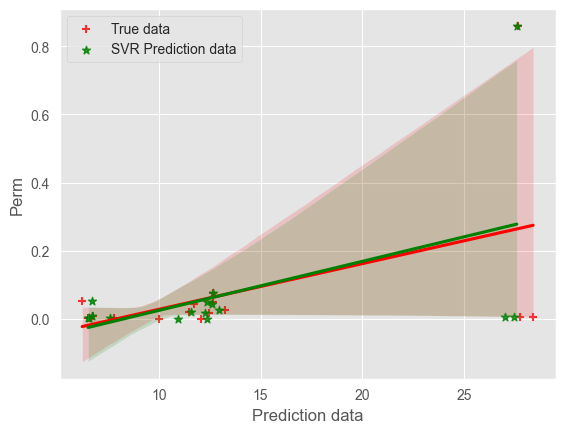

In [23]:
# SV REGRESSION (6 features only)
SVX_train = X_train.drop(['Dry Weight','Sample Volume','Sample Length','BI Vol.','Location','Bioturbation Index'], axis=1)
SVX_test  = X_test.drop(['Dry Weight','Sample Volume','Sample Length','BI Vol.','Location','Bioturbation Index'], axis=1)
SV_regressor = SVR(C=10, kernel='rbf')
SV_regressor.fit(SVX_train,y_train)
SV_pred = SV_regressor.predict(SVX_test)
SV_mae = mean_absolute_error(y_test,SV_pred)
SV_mse = mean_squared_error(y_test,SV_pred)
print('Mean Absolute Error:', SV_mae)
print('Mean Squared Error:', SV_mse)
svr_data = {'Prediction data': SV_pred, 'True data': y_test, 'Perm':X_test['Permeability']}
svr_df = pd.DataFrame(svr_data)

plt.style.use('ggplot')
sns.regplot(y='Perm', x='True data', data=svr_df, label='True data', color='red',marker='+')
sns.regplot(x='Prediction data', y='Perm', data=svr_df,label='SVR Prediction data',color='green', marker='*')
plt.gca().legend(loc='best')
plt.show()

KNN Mean Absolute Error: 0.6046023337544686
KNN Mean Squared Error: 0.5893689809564513


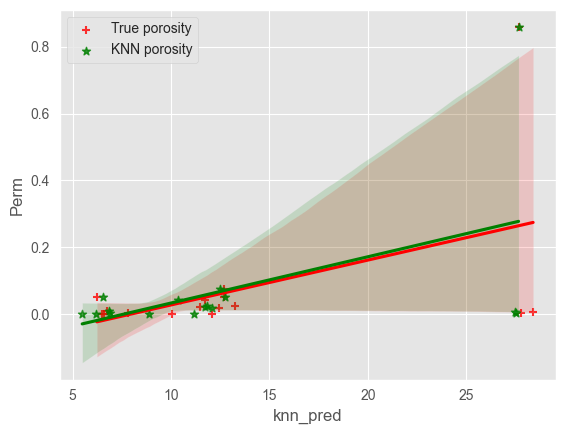

In [24]:
#KNN REGRESSOR (4 features only, Using f_regression score_fun)
KNRX_train = X_train[['Pore Volume','Particle Density','Permeability','Volumetric Density']]
KNRX_test = X_test[['Pore Volume','Particle Density','Permeability','Volumetric Density']]
KNN_regressor = KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')
KNN_regressor.fit(KNRX_train,y_train)
KN_pred = KNN_regressor.predict(KNRX_test)
KN_mae = mean_absolute_error(y_test,KN_pred)
KN_mse = mean_squared_error(y_test,KN_pred)
print('KNN Mean Absolute Error:', KN_mae)
print('KNN Mean Squared Error:', KN_mse)
knn_data = {'knn_pred':KN_pred, 'True_data':y_test, 'Perm':X_test['Permeability']}
knn_df = pd.DataFrame(knn_data)

plt.style.use('ggplot')
sns.regplot(y='Perm', x='True_data', data=knn_df, label='True porosity', color='red',marker='+')
sns.regplot(x='knn_pred', y='Perm', data=knn_df,label='KNN porosity',color='green', marker='*')
plt.gca().legend(loc='best')
plt.show()

DTR Mean Absolute Error: 0.8489249999999999
DTR Mean Squared Error: 1.1149788637499998


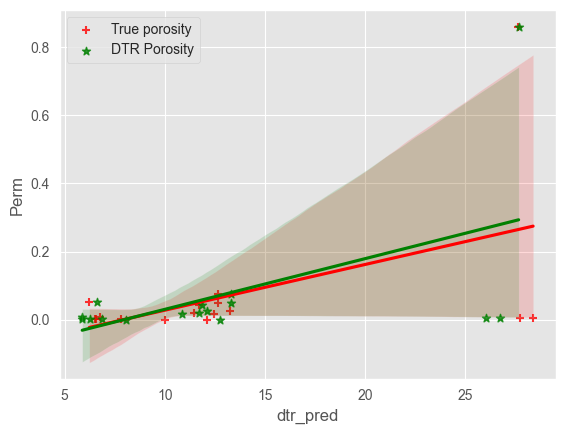

In [25]:
# DECISION TREE REGRESSOR ( 7 features only, using mutual_info_regression score_func)
DTRX_train = X_train.drop(['Dry Weight','Sample Length','BI Vol.','Location','Bioturbation Index'], axis=1) 
DTRX_test = X_test.drop(['Dry Weight','Sample Length','BI Vol.','Location','Bioturbation Index'], axis=1)
DTR_regressor = DecisionTreeRegressor(criterion='squared_error', splitter='random', random_state=0)
DTR_regressor.fit(DTRX_train,y_train)
DTR_pred = DTR_regressor.predict(DTRX_test)
DTR_mae = mean_absolute_error(y_test,DTR_pred)
DTR_mse = mean_squared_error(y_test,DTR_pred)
print('DTR Mean Absolute Error:', DTR_mae)
print('DTR Mean Squared Error:', DTR_mse)
dtr_data = {'dtr_pred':DTR_pred, 'True_data':y_test, 'Perm':X_test['Permeability']}
dtr_df= pd.DataFrame(dtr_data)

plt.style.use('ggplot')
sns.regplot(y='Perm', x='True_data', data=dtr_df, label='True porosity', color='red',marker='+')
sns.regplot(x='dtr_pred', y='Perm', data=dtr_df,label='DTR Porosity',color='green', marker='*')
plt.gca().legend(loc='best')
plt.show()

Random Forest Mean Absolute Error: 1.241171624999998
Random Forest Mean Squared Error: 4.3954802808108955


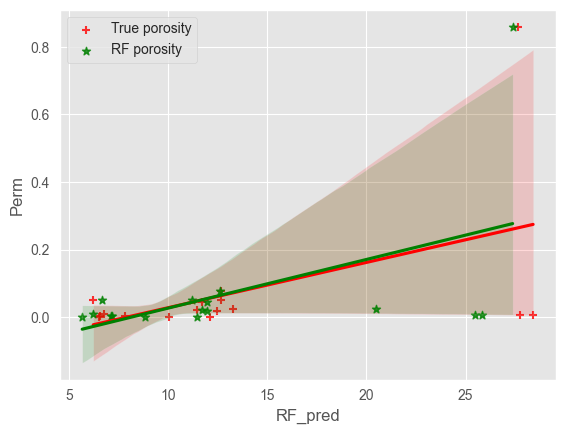

In [26]:
# Random Forest Regressor ( 5 features only, using mutual_info_regressions score_func)
RFRX_train = X_train[['Sample Diameter','Volumetric Density','Particle Density','Pore Volume','Permeability']]
RFRX_test  = X_test[['Sample Diameter','Volumetric Density','Particle Density','Pore Volume','Permeability']]
RFR_regressor = RandomForestRegressor(n_estimators=100, random_state=0,criterion='absolute_error')
RFR_regressor.fit(RFRX_train,y_train)
RF_pred = RFR_regressor.predict(RFRX_test)
RF_mae = mean_absolute_error(y_test,RF_pred)
RF_mse = mean_squared_error(y_test,RF_pred)
print('Random Forest Mean Absolute Error:', RF_mae)
print('Random Forest Mean Squared Error:', RF_mse)
rf_data = {'RF_pred':RF_pred, 'True_data':y_test,'Perm':X_test['Permeability']}
rf_df= pd.DataFrame(rf_data)

plt.style.use('ggplot')
sns.regplot(y='Perm', x='True_data', data=rf_df, label='True porosity', color='red',marker='+')
sns.regplot(x='RF_pred', y='Perm', data=rf_df,label='RF porosity',color='green', marker='*')
plt.gca().legend(loc='best')
plt.show()

 Linear regression Mean Absolute Error: 1.011896136017297
Linear regression Mean Squared Error: 1.3156678371633566


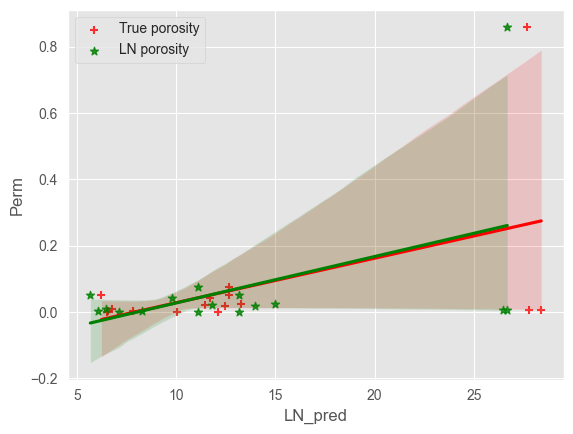

In [27]:
# LINEAR REGRESSION (7 features only, using f_regression score_func)
# Random Forest Regressor ( 4 features only, using mutual_info_regressions score_func)
LNR_train = X_train.drop(['Sample Volume','Sample Length','BI Vol.','Location','Bioturbation Index'], axis=1)
LNR_test  = X_test.drop(['Sample Volume','Sample Length','BI Vol.','Location','Bioturbation Index'], axis=1)
LNR = LinearRegression()
LNR.fit(LNR_train,y_train)
LN_pred = LNR.predict(LNR_test)
LN_mae = mean_absolute_error(y_test,LN_pred)
LN_mse = mean_squared_error(y_test,LN_pred)
print(' Linear regression Mean Absolute Error:', LN_mae)
print('Linear regression Mean Squared Error:', LN_mse)
rf_data = {'LN_pred':LN_pred, 'True_data':y_test,'Perm':X_test['Permeability']}
rf_df= pd.DataFrame(rf_data)

plt.style.use('ggplot')
sns.regplot(y='Perm', x='True_data', data=rf_df, label='True porosity', color='red',marker='+')
sns.regplot(x='LN_pred', y='Perm', data=rf_df,label='LN porosity',color='green', marker='*')
plt.gca().legend(loc='best')
plt.show()

In [28]:
error = {'SVR': [SV_mae, SV_mse], 'KNN': [KN_mae,KN_mse], 'DTR': [DTR_mae,DTR_mse], 'RF': [RF_mae,RF_mse], 'LNR': [LN_mae,LN_mse]}
ERROR = pd.DataFrame(error, index=['mean absolute error', 'mean squared error'])
ERROR.to_csv('Error.csv')
ERROR

,SVR,KNN,DTR,RF,LNR
mean absolute error,0.347968,0.604602,0.848925,1.241172,1.011896
mean squared error,0.263218,0.589369,1.114979,4.395480,1.315668


In [30]:
Predictions = {'True Por': y_test,'SV Por':SV_pred ,'KNR Por':KN_pred,'DTR Por': DTR_pred ,'RF Por': RF_pred, 'LN Por': LN_pred}
Predictions = pd.DataFrame(Predictions)
Predictions.to_csv('Porosity.csv')